<a href="https://colab.research.google.com/github/ruedas91/FinTechrueda/blob/main/FullGC_preventing_credit_card_defaults_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preventing Credit Card Defaults - Part 1

In this activity, you will use Keras to build a neural network model that predicts whether a credit card customer will default on their debt. You will apply what you learned in the previous demonstration. But, instead of using a dataset that contains 2 features, you will build a neural network model from a dataset that contains 22 features and 1 target.

## Instructions:

1. Read the CSV file from the Resources folder into a Pandas DataFrame.

2. Define the features set `X` by including all of the DataFrame columns except the “DEFAULT” column.

3. Create the target `y` by assigning the values of the DataFrame “DEFAULT” column.

4. Create the training and testing sets using the `train_test_split` function from scikit-learn.

5. Scale the features data using the `StandardScaler` from sklearn.

6. Create a neural network model with an input layer that consists of 22 inputs, one hidden layer, and an output layer. Use the `units` parameter to define 12 neurons for the hidden layer and a single output for the output layer. Use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.

7. Display the model structure using the `summary` function.

## References:

[Keras Sequential model](https://keras.io/api/models/sequential/)

[Keras Dense module](https://keras.io/api/layers/core_layers/dense/)


In [ ]:
# Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

%matplotlib inline

## Step 1:  Read the CSV file from the Resources folder into a Pandas DataFrame.

In [ ]:
# Upload cc_default.csv to Colab
from google.colab import files

csv_file = files.upload()

Saving cc_default.csv to cc_default (3).csv


In [ ]:
# Read the into a Pandas DataFrame
cc_df = pd.read_csv("cc_default.csv")

# Review the DataFrame
cc_df


,LIMIT_BAL,EDUCATION,MARITAL_STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,1,39,0,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,3,2,43,-1,-1,-1,-1,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,2,2,37,4,3,2,-1,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,3,1,41,1,-1,0,0,0,-1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Step 2: Define the features set `X` by including all of the DataFrame columns except the “DEFAULT” column.

In [ ]:
# Define features set X by selecting all columns but DEFAULT
X = cc_df.drop(columns=["DEFAULT"]).copy()

# Display the features DataFrame
X


,LIMIT_BAL,EDUCATION,MARITAL_STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,57,-1,0,-1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,1,39,0,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,3,2,43,-1,-1,-1,-1,0,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,2,2,37,4,3,2,-1,0,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,3,1,41,1,-1,0,0,0,-1,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


## Step 3: Create the target `y` by assigning the values of the DataFrame “DEFAULT” column.

In [ ]:
# Define target set by selecting the DEFAULT column
y = cc_df["DEFAULT"]

# Display a sample y
y[:5]


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

## Step 4: Create the training and testing sets using the `train_test_split` function from scikit-learn.

In [ ]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Step 5: Scale the features data using the `StandardScaler` from sklearn.

In [ ]:
# Create the StandardScaler instance
X_scaler = StandardScaler()


In [ ]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [ ]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Step 6: Create a neural network model with an input layer that consists of 22 inputs, one hidden layer, and an output layer. Use the `units` parameter to define 12 neurons for the hidden layer and a single output for the output layer. Use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.

In [ ]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
# Define the the number of inputs to the model
number_inputs = 22

# Define the number of hidden nodes for the model
number_hidden_nodes = 12

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
neuron.add(Dense(1, activation="sigmoid"))


## Step 7: Display the model structure using the `summary` function.

In [ ]:
# Display the Sequential model summary
neuron.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                276       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fitting the model
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
704/704 [==============================] - 2s 2ms/step - loss: 0.6011 - accuracy: 0.7349
Epoch 2/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4652 - accuracy: 0.8121
Epoch 3/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.8160
Epoch 4/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.8191
Epoch 5/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.8207
Epoch 6/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.8204
Epoch 7/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4391 - accuracy: 0.8203
Epoch 8/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.8195
Epoch 9/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.8208
Epoch 10/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4360 - accura

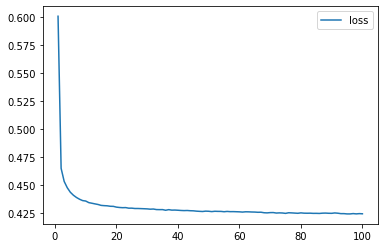

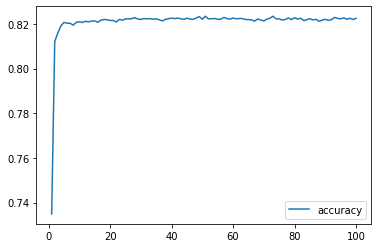

In [ ]:
# Plotting the Loss and Accuracy
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

# Plot the accuracy
df.plot(y="accuracy")


In [3]:
# Evaluating the model usintesting data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NameError: ignored

MAKING PREDICTIONS WITH A NEURAL NETWORK MODEL


In [2]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1)

# Make predictions
predictions = (neuron.predict(new_X) > 0.5).astype("int32")



NameError: ignored

In [ ]:
# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})

# Display sample data
results.head(10)

NameError: ignored